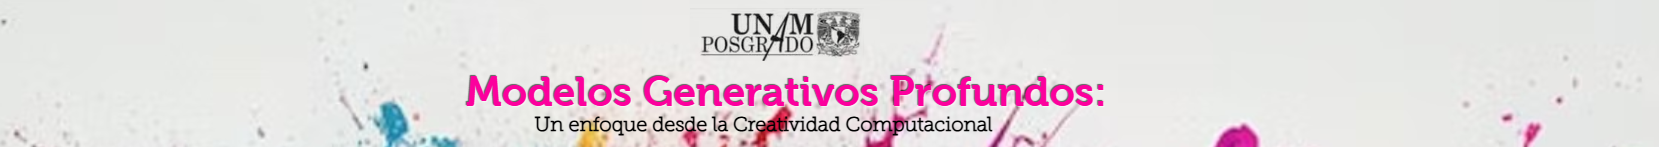

# Vectorización

**1. Ejercicio del efecto de la vectorización.**

Ejecuta las siguientes dos celdas correspondientes a dos implementaciones, la primera con un ciclo for explícito y la segunda en su versión vectorizada.
Observa la diferencia en tiempo de ejecución.

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
n =  10000000
u = np.random.rand(n)
v = np.random.rand(n)

In [3]:
import time
# Haremos w = u1v1+u2v2+ ... + unvn

# 1) Con un ciclo for
inicio = time.time()
w=0
for i in range(n):
  w+= u[i]*v[i]
fin = time.time()

print("Version for: ", str(1000*(fin-inicio)) + "ms")
print(w)

# 2) Versión vectorizada
inicio = time.time()
w = np.dot(u,v)
fin = time.time()
print("Version vectorizada: ", str(1000*(fin-inicio)) + "ms")
#print("Version vectorizada: ", round(fin-inicio,4), "seg")
print(w)



Version for:  1391.0059928894043ms
2499191.5458819764
Version vectorizada:  2.332925796508789ms
2499191.545882403


**2. Reto de vectorización**

In [4]:
A = np.array([
                [56.0, 0.0, 4.4, 68.0],
                [1.2, 104.0, 52.0, 8.0],
                [1.8, 135.0, 99.0, 0.9]

             ])
print("A = ", A, "\n")

#Se suman todas las columnas
S = np.sum(A, axis=0) # axix=0 indica que tiene que colapsar los renglones
print("S =", S, "\n")

P = A/S

# Nota: Se podría hacer también como P = A/S.reshape(1,4)
print(P)

a=np.array([100])
print(a.shape)


A =  [[ 56.    0.    4.4  68. ]
 [  1.2 104.   52.    8. ]
 [  1.8 135.   99.    0.9]] 

S = [ 59.  239.  155.4  76.9] 

[[0.94915254 0.         0.02831403 0.88426528]
 [0.02033898 0.43514644 0.33462033 0.10403121]
 [0.03050847 0.56485356 0.63706564 0.01170351]]
(1,)


In [5]:
v=np.array([ [1,2,3],
             [4,5,6]
           ])
u=np.array([10,20]).reshape(2,1)

print(u+v)

[[11 12 13]
 [24 25 26]]


**3. Ejercicio de vectorización en GPU**

In [6]:
# ============================================
# Benchmark: Python for vs NumPy vs TensorFlow (CPU/GPU/XLA)
# ============================================


# --------------------------
# Datos base (mismo contenido para todos)
# Ajusta N si quieres ver más diferencia (p.ej., 10_000_000)
# --------------------------
N = 100_000_000
rng = np.random.default_rng(0)
u_np = rng.random(N, dtype=np.float32)
v_np = rng.random(N, dtype=np.float32)

# ==========================================================
# 1) Python puro: sum_{i} u[i]*v[i] con for (CPU, lenta)
# ==========================================================
def dot_for(u, v):
    s = 0.0
    for i in range(u.shape[0]):
        s += float(u[i]) * float(v[i])
    return s

inicio = time.time()
dot_for(u_np, v_np)
fin = time.time()
print("Version for: ", str(1000*(fin-inicio)) + "ms")

# ============================================
# 2) NumPy vectorizado (CPU / BLAS)
# ============================================
inicio = time.time()
np.dot(u_np, v_np)
fin = time.time()
print("NumPy dot (CPU): ", str(1000*(fin-inicio)) + "ms")


# ============================================
# 3) TensorFlow: CPU vs GPU (eager) y GPU
# ============================================
try:
    import tensorflow as tf
    tf.random.set_seed(0)

    print("\nTensorFlow:", tf.__version__)

    devices = tf.config.list_physical_devices()
    print("\nDevices: ", devices)

    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        details = tf.config.experimental.get_device_details(gpus[0])
        print("GPU details: ", details)
    else:
        print("No GPU found.")


    # --- Tensores CPU (desde arrays NumPy) ---
    u_tf_cpu = tf.convert_to_tensor(u_np)  # reside en CPU
    v_tf_cpu = tf.convert_to_tensor(v_np)

    def tf_eager_cpu():
        _ = tf.reduce_sum(u_tf_cpu * v_tf_cpu)

    inicio = time.time()
    tf_eager_cpu()
    fin = time.time()
    print("TF eager (CPU): ", str(1000*(fin-inicio)) + "ms")


    # --- GPU: crea datos directamente en GPU para evitar overhead de copia ---
    if gpus:
        with tf.device("/GPU:0"):
            u_tf_gpu = tf.constant(u_np)  # se sube una vez
            v_tf_gpu = tf.constant(v_np)

        def tf_eager_gpu():
            with tf.device("/GPU:0"):
                _ = tf.reduce_sum(u_tf_gpu * v_tf_gpu)

        inicio = time.time()
        tf_eager_gpu()
        fin = time.time()
        print("TF eager (GPU): ", str(1000*(fin-inicio)) + "ms")
    else:
        print("No se detectó GPU. Las pruebas GPU se omiten.")

except Exception as e:
    print("Saltando parte TensorFlow por error:", e)

# Nota: imprimimos solo tiempos; los resultados numéricos se desechan para evitar mezclar I/O con el tiempo.


Version for:  8940.233945846558ms
NumPy dot (CPU):  9.39798355102539ms

TensorFlow: 2.20.0

Devices:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
No GPU found.
TF eager (CPU):  115.57888984680176ms
No se detectó GPU. Las pruebas GPU se omiten.
